<h2><u>Bus Data</u></h2>
<h3><u>Focus</u>: <i>Journey_Pattern_ID</i></h3>

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt

# Importing matplotlib for visualisations & plotting
import matplotlib.pyplot as plt


# Importing to show plots in the notebook
%matplotlib inline

In [2]:
# Read in the bus data CSV file
dfraw = pd.read_csv('siri.20121106.csv')

C:\Users\steph\Anaconda3\envs\dublinBus\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Select the first 20 rows
dfraw.head(20)

,Timestamp,Line_ID,Direction,Journey_Pattern_ID,Time_Frame,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop
0,1352160000000000,15,0,00150001,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0
1,1352160000000000,46,0,046A1002,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0
2,1352160000000000,14,0,00140001,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0
3,1352160002000000,41,0,041B0002,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1
4,1352160002000000,63,0,null,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0
5,1352160002000000,39,0,039A1002,2012-11-05,3795,PO,0,-6.262447,53.346767,-532,39026,36060,1479,0
6,1352160002000000,65,0,00650001,2012-11-05,4004,RD,0,-6.594641,53.129776,-287,65003,38004,7283,0
7,1352160002000000,40,0,040D1001,2012-11-05,2466,HN,0,-6.258850,53.362499,-488,40207,33274,52,0
8,1352160002000000,4,0,null,2012-11-05,5076,HN,0,-6.261073,53.352112,0,4003,43035,4725,0
9,1352160002000000,11,0,00111002,2012-11-05,5241,D1,0,-6.230217,53.323002,-536,11001,33462,320,0


In [4]:
# Count the rows and columns via shape
dfraw.shape

(1765912, 15)

In [5]:
# Display the data types

dfraw.dtypes

Timestamp               int64
Line_ID                object
Direction               int64
Journey_Pattern_ID     object
Time_Frame             object
Vehicle_Journey_ID      int64
Operator               object
Congestion              int64
Lon                   float64
Lat                   float64
Delay                   int64
Block_ID                int64
Vehicle_ID              int64
Stop_ID                object
At_Stop                 int64
dtype: object

In [6]:
# Format of the unix timestamp needs to be altered to be converted to readible format. Conversion is from ms to seconds
dfraw['unix'] = dfraw['Timestamp']//1000000
# Now convert to datetime format
dfraw['unix'] = pd.to_datetime(dfraw['unix'], unit='s')

In [7]:
# Make new column for day of the week. Eventually we may wish to query times according to day of week. 
dfraw['weekday'] = dfraw['unix'].dt.dayofweek

In [8]:
dfraw['Journey_Pattern_ID'].replace('', np.nan, inplace=True)
dfraw['Line_ID'].replace('', np.nan, inplace=True)
dfraw['Vehicle_Journey_ID'].replace('', np.nan, inplace=True)
dfraw['Lon'].replace('', np.nan, inplace=True)
dfraw['Lat'].replace('', np.nan, inplace=True)
dfraw['Stop_ID'].replace('', np.nan, inplace=True)
dfraw['At_Stop'].replace('', np.nan, inplace=True)
dfraw['Line_ID'].replace('null', np.nan, inplace=True)
dfraw['Vehicle_Journey_ID'].replace('null', np.nan, inplace=True)
dfraw['Lon'].replace('null', np.nan, inplace=True)
dfraw['Lat'].replace('null', np.nan, inplace=True)
dfraw['Stop_ID'].replace('null', np.nan, inplace=True)
dfraw['At_Stop'].replace('null', np.nan, inplace=True)

In [9]:
dfraw.shape

(1765912, 17)

In [10]:
dfraw = dfraw.drop_duplicates()

In [11]:
dfraw.shape

(1765912, 17)

In [12]:
# identify columns of cardinality 1.In this case we are only dealing with a specific day, so weekday will not be deleted. 
# Others like Direction can be deleted.
print("Feature, Cardinality") 
for column in dfraw:
    print(column + "," + str(len(dfraw[column].unique())))

Feature, Cardinality
Timestamp,30017
Line_ID,143
Direction,1
Journey_Pattern_ID,447
Time_Frame,2
Vehicle_Journey_ID,7530
Operator,8
Congestion,2
Lon,271998
Lat,81904
Delay,5137
Block_ID,917
Vehicle_ID,835
Stop_ID,4716
At_Stop,2
unix,30017
weekday,1


In [13]:
# Drop the 6 constant columns and display change
dfraw = dfraw.drop(['Direction'], 1)

In [14]:
print("Feature, Missing Values") 
dfraw.isnull().sum()

Feature, Missing Values


Timestamp                  0
Line_ID                 9524
Journey_Pattern_ID        64
Time_Frame                 0
Vehicle_Journey_ID         0
Operator                   0
Congestion                 0
Lon                        0
Lat                        0
Delay                      0
Block_ID                   0
Vehicle_ID                 0
Stop_ID               105009
At_Stop                    0
unix                       0
weekday                    0
dtype: int64

In [15]:
dfraw.dropna(subset=['Line_ID'], inplace=True)
dfraw.dropna(subset=['Vehicle_Journey_ID'], inplace=True)
dfraw.dropna(subset=['Lon'], inplace=True)
dfraw.dropna(subset=['Lat'], inplace=True)
dfraw.dropna(subset=['Stop_ID'], inplace=True)
dfraw.dropna(subset=['At_Stop'], inplace=True)

In [16]:
# convert integers to lower number to improve speed across dataset.
dfraw['Delay'] = dfraw['Delay'].astype(np.int32)
dfraw['Vehicle_Journey_ID'] = dfraw['Vehicle_Journey_ID'].astype(np.int32)
dfraw['Congestion'] = dfraw['Congestion'].astype(np.int32)
dfraw['Block_ID'] = dfraw['Block_ID'].astype(np.int32)
dfraw['Stop_ID'] = dfraw['Stop_ID'].astype(np.int32)
dfraw['At_Stop'] = dfraw['At_Stop'].astype(np.int32)

In [17]:
# Still some missing. Figure our stategy for dealing with these.
print("Feature, Missing Values") 
dfraw.isnull().sum()

Feature, Missing Values


Timestamp              0
Line_ID                0
Journey_Pattern_ID    36
Time_Frame             0
Vehicle_Journey_ID     0
Operator               0
Congestion             0
Lon                    0
Lat                    0
Delay                  0
Block_ID               0
Vehicle_ID             0
Stop_ID                0
At_Stop                0
unix                   0
weekday                0
dtype: int64

In [18]:
x = dfraw.Vehicle_Journey_ID.unique()

In [19]:
y = dfraw.Vehicle_ID.unique()

In [20]:
z = dfraw.Block_ID.unique()

In [21]:
len(y)

835

In [22]:
# Pong's calculation for altering the journey_pattern_id
# for i in range(0,dfraw.shape[0]):
#     if  pd.isnull(dfraw['Journey_Pattern_ID'][i])==False and dfraw['Journey_Pattern_ID'][i][0]=='0':
#         dfraw['Journey_Pattern_ID'][i]=dfraw['Journey_Pattern_ID'][i][1:]

In [23]:
dfraw['hour'] = dfraw['unix'].dt.hour

In [24]:
dfraw.head(20)

,Timestamp,Line_ID,Journey_Pattern_ID,Time_Frame,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,unix,weekday,hour
0,1352160000000000,15,00150001,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0,2012-11-06 00:00:00,1,0
1,1352160000000000,46,046A1002,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0,2012-11-06 00:00:00,1,0
2,1352160000000000,14,00140001,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0,2012-11-06 00:00:00,1,0
3,1352160002000000,41,041B0002,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1,2012-11-06 00:00:02,1,0
4,1352160002000000,63,null,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0,2012-11-06 00:00:02,1,0
5,1352160002000000,39,039A1002,2012-11-05,3795,PO,0,-6.262447,53.346767,-532,39026,36060,1479,0,2012-11-06 00:00:02,1,0
6,1352160002000000,65,00650001,2012-11-05,4004,RD,0,-6.594641,53.129776,-287,65003,38004,7283,0,2012-11-06 00:00:02,1,0
7,1352160002000000,40,040D1001,2012-11-05,2466,HN,0,-6.258850,53.362499,-488,40207,33274,52,0,2012-11-06 00:00:02,1,0
8,1352160002000000,4,null,2012-11-05,5076,HN,0,-6.261073,53.352112,0,4003,43035,4725,0,2012-11-06 00:00:02,1,0
9,1352160002000000,11,00111002,2012-11-05,5241,D1,0,-6.230217,53.323002,-536,11001,33462,320,0,2012-11-06 00:00:02,1,0


In [25]:
dfraw['Journey_Pattern_ID'] = dfraw['Journey_Pattern_ID'].astype(str).str[:-4]
dfraw.head(20)

,Timestamp,Line_ID,Journey_Pattern_ID,Time_Frame,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,unix,weekday,hour
0,1352160000000000,15,0015,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0,2012-11-06 00:00:00,1,0
1,1352160000000000,46,046A,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0,2012-11-06 00:00:00,1,0
2,1352160000000000,14,0014,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0,2012-11-06 00:00:00,1,0
3,1352160002000000,41,041B,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1,2012-11-06 00:00:02,1,0
4,1352160002000000,63,,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0,2012-11-06 00:00:02,1,0
5,1352160002000000,39,039A,2012-11-05,3795,PO,0,-6.262447,53.346767,-532,39026,36060,1479,0,2012-11-06 00:00:02,1,0
6,1352160002000000,65,0065,2012-11-05,4004,RD,0,-6.594641,53.129776,-287,65003,38004,7283,0,2012-11-06 00:00:02,1,0
7,1352160002000000,40,040D,2012-11-05,2466,HN,0,-6.258850,53.362499,-488,40207,33274,52,0,2012-11-06 00:00:02,1,0
8,1352160002000000,4,,2012-11-05,5076,HN,0,-6.261073,53.352112,0,4003,43035,4725,0,2012-11-06 00:00:02,1,0
9,1352160002000000,11,0011,2012-11-05,5241,D1,0,-6.230217,53.323002,-536,11001,33462,320,0,2012-11-06 00:00:02,1,0


In [26]:
dfraw['Journey_Pattern_ID'] = dfraw['Journey_Pattern_ID'].astype(str).str[1:]
dfraw.head(20)

,Timestamp,Line_ID,Journey_Pattern_ID,Time_Frame,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,unix,weekday,hour
0,1352160000000000,15,015,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0,2012-11-06 00:00:00,1,0
1,1352160000000000,46,46A,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0,2012-11-06 00:00:00,1,0
2,1352160000000000,14,014,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0,2012-11-06 00:00:00,1,0
3,1352160002000000,41,41B,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1,2012-11-06 00:00:02,1,0
4,1352160002000000,63,,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0,2012-11-06 00:00:02,1,0
5,1352160002000000,39,39A,2012-11-05,3795,PO,0,-6.262447,53.346767,-532,39026,36060,1479,0,2012-11-06 00:00:02,1,0
6,1352160002000000,65,065,2012-11-05,4004,RD,0,-6.594641,53.129776,-287,65003,38004,7283,0,2012-11-06 00:00:02,1,0
7,1352160002000000,40,40D,2012-11-05,2466,HN,0,-6.258850,53.362499,-488,40207,33274,52,0,2012-11-06 00:00:02,1,0
8,1352160002000000,4,,2012-11-05,5076,HN,0,-6.261073,53.352112,0,4003,43035,4725,0,2012-11-06 00:00:02,1,0
9,1352160002000000,11,011,2012-11-05,5241,D1,0,-6.230217,53.323002,-536,11001,33462,320,0,2012-11-06 00:00:02,1,0


In [27]:
#for i in dfraw['Journey_Pattern_ID']:
#    if i == "":
#        print("null")
#    else:
#        print(i[0])        

In [28]:
#for i in dfraw['Journey_Pattern_ID']:
#    if i == '':
#        print("null")      
#    elif i[0] != "0":
#        pass
#    else:
#        dfraw['Journey_Pattern_ID'] = dfraw['Journey_Pattern_ID'].astype(str).str[1:]  

In [29]:
# Verify that JP_ID's starting with 0 are removed, and those that do not, are not
dfraw.head(5)

,Timestamp,Line_ID,Journey_Pattern_ID,Time_Frame,Vehicle_Journey_ID,Operator,Congestion,Lon,Lat,Delay,Block_ID,Vehicle_ID,Stop_ID,At_Stop,unix,weekday,hour
0,1352160000000000,15,015,2012-11-05,5826,RD,0,-6.258584,53.340099,-361,15013,33210,4870,0,2012-11-06 00:00:00,1,0
1,1352160000000000,46,46A,2012-11-05,7267,D2,0,-6.259093,53.345425,-1101,46004,36024,794,0,2012-11-06 00:00:00,1,0
2,1352160000000000,14,014,2012-11-05,6206,D2,0,-6.257329,53.287521,-126,14003,33325,1047,0,2012-11-06 00:00:00,1,0
3,1352160002000000,41,41B,2012-11-05,61,SL,0,-6.264167,53.453217,-623,41008,33631,3874,1,2012-11-06 00:00:02,1,0
4,1352160002000000,63,,2012-11-05,1116,D2,0,-6.171050,53.259201,292,63003,33137,3283,0,2012-11-06 00:00:02,1,0


<h2><u>School Data</u></h2>
<h3><u>Focus</u>: <i>Primary Schools in Dublin</i></h3>

In [30]:
df_primary = pd.read_csv('primary_schools_2013_2014.csv')

In [31]:
df_primary.head(20)

,AIRO_ID,Roll_No,Off_Name,Add_1,Add_2,Add_3,Add_4,County,Ethos,Island,DEIS,Gaeltacht,M_13_14,F_13_14,T_13_14,xcoord,ycoord,Long,Lat
0,1,00651R,BORRIS MXD N S,BORRIS,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,100,94,194,273199.0,150324.0,-6.91956,52.5993
1,2,00977B,BALLYCONNELL N S,Ballyconnell,Tullow,Co Carlow,NaN,Carlow,CATHOLIC,N,N,N,80,79,159,292481.0,174367.0,-6.62828,52.8124
2,3,01116A,BAILE AN CHUILINN N S,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,56,55,111,272463.0,155784.0,-6.92923,52.6485
3,4,01215C,NEWTOWN DUNLECKNEY MXD,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,69,61,130,275959.0,164072.0,-6.87567,52.7225
4,5,01415K,RATHOE NS,RATHOE,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,92,86,178,281027.0,171359.0,-6.79887,52.7872
5,6,02124E,SCOIL NAIS MOLAISE,OLD LEIGHLIN,VIA BILBOA,CO CARLOW,NaN,Carlow,CATHOLIC,N,N,N,74,66,140,265307.0,165801.0,-7.03297,52.7394
6,7,04077I,SCOIL NAIS BHRIDE,GRANGE,TULLOW,CO CARLOW,NaN,Carlow,CATHOLIC,N,N,N,88,71,159,282120.0,176948.0,-6.78127,52.8373
7,8,09320Q,SCOIL NAIS MHUIRE,DROIMFEIGH,BAGENALSTOWN,CO CARLOW,NaN,Carlow,CATHOLIC,N,N,N,53,47,100,278553.0,156943.0,-6.83898,52.6581
8,9,11135K,ST MARYS N S,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CHURCH OF IRELAND,N,N,N,39,41,80,270371.0,161495.0,-6.95892,52.7001
9,10,13105L,ST BRIDGETS MONASTERY,MUINEBEAG,CO CARLOW,NaN,NaN,Carlow,CATHOLIC,N,N,N,116,1,117,270696.0,161495.0,-6.95411,52.7000


In [32]:
df_primary.shape

(3145, 19)

In [33]:
# Displaying the current data types of each columns
df_primary.dtypes

AIRO_ID        int64
Roll_No       object
Off_Name      object
Add_1         object
Add_2         object
Add_3         object
Add_4         object
County        object
Ethos         object
Island        object
DEIS          object
Gaeltacht     object
M_13_14        int64
F_13_14        int64
T_13_14        int64
xcoord       float64
ycoord       float64
Long         float64
Lat          float64
dtype: object

In [34]:
# Drop unneeded rows
df_primary.drop(['Roll_No', 'Add_3', 'Add_4', 'Ethos', 'Island', 'DEIS', 'Gaeltacht', 'M_13_14', 'F_13_14'], axis = 1, inplace = True)   

In [35]:
# Change name of column
df_primary.rename(columns={'T_13_14': 'Total_Students'}, inplace=True)

In [36]:
# Drop duplicate rows and columns, if any.
df_primary_edited = df_primary.drop_duplicates()

In [37]:
# Check new shape
df_primary_edited.shape

(3145, 10)

In [38]:
# Check unique values for County (Irregular Cardinality), only need Dublin information
df_primary_edited.County.unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow'], dtype=object)

In [39]:
# Information for Dublin
df_primary_edited = df_primary_edited[df_primary_edited.County == 'Dublin']

In [40]:
# New shape
df_primary_edited.shape

(440, 10)

In [41]:
# Verify 
df_primary_edited.head(20)

,AIRO_ID,Off_Name,Add_1,Add_2,County,Total_Students,xcoord,ycoord,Long,Lat
752,753,CENTRAL SENIOR MXD N S,MARLBORO ST,DUBLIN 1,Dublin,208,316182.0,234864.0,-6.25505,53.3512
753,754,CENTRAL INFS SCHOOL,MARLBORO ST,DUBLIN 1,Dublin,164,316191.0,234838.0,-6.25492,53.3510
754,755,NAOMH PADRAIG BOYS,CAMBRIDGE ROAD,RINGSEND,Dublin,119,318248.0,234019.0,-6.22435,53.3432
755,756,SCOIL AN CROI NAOFA,GLASNEVIN,DUBLIN 11,Dublin,453,314874.0,238474.0,-6.27337,53.3839
756,757,PRESENTATION PRIMARY SCHOOL,GEORGES HILL,DUBLIN 7,Dublin,176,315140.0,234486.0,-6.27083,53.3481
757,758,GOLDENBRIDGE CONVENT,GOLDENBRIDGE,INCHICORE,Dublin,267,312021.0,233117.0,-6.31813,53.3364
758,759,ST JOSEPHS BOYS N S,TERENURE,DUBLIN 6,Dublin,480,314560.0,230169.0,-6.28109,53.3094
759,760,STANHOPE ST CONVENT,STANHOPE STREET,DUBLIN 7,Dublin,346,314534.0,234953.0,-6.27975,53.3524
760,761,CHAPELIZOD N S,CHAPELIZOD,DUBLIN 20,Dublin,30,310279.0,234590.0,-6.34376,53.3500
761,762,ST PATRICKS N SCHOOL,DRUMCONDRA,DUBLIN 9,Dublin,488,315979.0,236945.0,-6.25733,53.3700


In [42]:
df_primary_edited['AIRO_ID'] = df_primary_edited['AIRO_ID'].astype('object')
df_primary_edited['Off_Name'] = df_primary_edited['Off_Name'].astype('category')
df_primary_edited['Add_1'] = df_primary_edited['Add_1'].astype('category')
df_primary_edited['Add_2'] = df_primary_edited['Add_2'].astype('category')
df_primary_edited['County'] = df_primary_edited['County'].astype('category')
df_primary_edited['Total_Students'] = df_primary_edited['Total_Students'].astype('int64')
df_primary_edited['xcoord'] = df_primary_edited['xcoord'].astype('object')
df_primary_edited['ycoord'] = df_primary_edited['ycoord'].astype('object')
df_primary_edited['Long'] = df_primary_edited['Long'].astype('object')
df_primary_edited['Lat'] = df_primary_edited['Lat'].astype('object')

df_primary_edited.dtypes

AIRO_ID             object
Off_Name          category
Add_1             category
Add_2             category
County            category
Total_Students       int64
xcoord              object
ycoord              object
Long                object
Lat                 object
dtype: object

In [43]:
# Prepare a table with descriptive statistics for all the continuous features.
df_primary_edited.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Students,440.0,294.859091,167.647594,6.0,173.75,259.0,412.0,947.0


In [44]:
# Prepare a table with descriptive statistics for all the categorical features.
category_columns = df_primary_edited.select_dtypes(['category']).columns
df_primary_edited[category_columns].describe().T

,count,unique,top,freq
Off_Name,440,423,SCOIL MHUIRE,6
Add_1,440,357,CABRA,5
Add_2,440,210,CO DUBLIN,35
County,440,1,Dublin,440


In [45]:
# Check for irregular cardinality
pd.unique(df_primary_edited.Off_Name.ravel())

array(['CENTRAL SENIOR MXD N S', 'CENTRAL INFS SCHOOL',
       'NAOMH PADRAIG BOYS', 'SCOIL AN CROI NAOFA',
       'PRESENTATION PRIMARY SCHOOL', 'GOLDENBRIDGE CONVENT',
       'ST JOSEPHS BOYS N S', 'STANHOPE ST CONVENT', 'CHAPELIZOD N S',
       'ST PATRICKS N SCHOOL', 'CITY QUAY BOYS N S',
       'ST LAURENCE O TOOLE JUNIOR BOYS', 'SCOIL MHUIRE',
       'GARDINER STREET CONVENT', 'KILDARE PLACE  N S', 'HOWTH RD MXD N S',
       'ST COLUMBAS N S MXD', 'ST ENDAS PRIMARY SCHOOL', 'RATHGAR N S',
       'ZION PARISH PRIMARY SCHOOL', 'GLASNEVIN N S',
       'S N SAN VINSEANN CAILIN', 'ST PATRICKS GIRLS NS', 'SANDFORD N S',
       'ST PATRICKS NS', 'ST CATHERINES WEST N S', 'ST VINCENTS INF BOYS',
       'DRUMCONDRA N S', 'Star of the Sea', 'LINDSAY ROAD N S',
       'ST BRIGIDS CONVENT N S', 'ST BRIGIDS CONVENT',
       'ST CLARES CONVENT N S', 'ST COLUMBAS CON G & I',
       'SCOIL NA MBRATHAR', 'ST VINCENT DE PAULS GIRLS SCHOOL',
       'ST VINCENTS CONVENT INF N S', 'S N MHUIRE NA MBRA

In [46]:
# Check for irregular cardinality
pd.unique(df_primary_edited.Add_1.ravel())

array(['MARLBORO ST', 'CAMBRIDGE ROAD', 'GLASNEVIN', 'GEORGES HILL',
       'GOLDENBRIDGE', 'TERENURE', 'STANHOPE STREET', 'CHAPELIZOD',
       'DRUMCONDRA', 'CITY QUAY', 'SEVILLE PLACE', 'Gilford Road',
       'GARDINER STREET', '96 UPPER RATHMINES RD', 'BLACKPITTS',
       'HOWTH RD', 'NORTH STRAND', 'ST ENDAS PRIMARY SCHOOL', 'RATHGAR',
       'BUSHY PARK ROAD', 'BOTANIC AVENUE', 'NORTH WILLIAM ST', 'RANELAGH',
       'CHAPELIZOD VILLAGE', 'DONORE AVENUE', 'NORTH WILLIAM STREET',
       'CHURCH AVENUE', 'SANDYMOUNT', 'LINDSAY ROAD', 'HADDINGTON ROAD',
       'HAROLDS CROSS ROAD', 'IONA ROAD', 'NORTH BRUNSWICK STREET',
       'GRIFFITH AVENUE', '67 GRIFFITH AVENUE', 'MARINO', 'THE COOMBE',
       'KILLESTER', 'HOME FARM ROAD', 'LORETO COLLEGE', '1 ZION ROAD',
       'CABRA', 'INCHICORE', 'PRIORSWOOD', 'PLAS SEIBHIL', 'SEAFIELD ROAD',
       'WILLIAMS PARK', 'Christian Brothers', 'LARKHILL', 'MOURNE ROAD',
       'NAVAN ROAD', 'Kilkieran Road', 'AUGHAVANNAGH ROAD', 'CRUMLIN ROAD',
   

In [47]:
# Check for irregular cardinality
pd.unique(df_primary_edited.Add_2.ravel())

array(['DUBLIN 1', 'RINGSEND', 'DUBLIN 11', 'DUBLIN 7', 'INCHICORE',
       'DUBLIN 6', 'DUBLIN 20', 'DUBLIN 9', 'DUBLIN 2', 'Sandymount',
       'DUBLIN 8', 'DUBLIN 6W', 'CLONTARF', 'DUBLIN 3', 'WHITEFRIAR ST',
       'RATHGAR', 'GLASNEVIN', 'DUBLIN 4', 'CHAPELIZOD',
       'SOUTH CIRCULAR ROAD', 'DRUMCONDRA', 'DUBLIN 5', 'CRUMLIN RD',
       'DUBLIN 17', 'BAILE ATHA CLIATH 1', 'RATHMINES', 'Glasnevin',
       'WHITEHALL', 'DRIMNAGH', 'DUBLIN 12', 'Cabra West', 'CRUMLIN',
       'DOMHNACH CAIRNE', 'RAHENY', 'BAILE UAILCIN', 'SANDYMOUNT',
       'DUBLIN 10', 'LOUGH DERG RD', 'BR FEADHA CUILINN', 'FINGLAS WEST',
       'FINGLAS NORTH-WEST', 'BAILE MUNNA', 'BALLYMUN', 'ARTANE',
       'KILLESTER', 'BAILE ATH CLIATH 5', 'GLASNAOIN', 'DONAGHMEDE',
       'DARNDALE', 'MALAHIDE RD', 'DUBLIN 13', 'RIVERMOUNT',
       'ST HELENAS DRIVE', 'BALCURRIS', 'BAILE ATHA CLIATH 8', 'FINGLAS',
       'MONTROSE', 'BALLYFERMOT', 'DONNYBROOK', 'GHLAIS CILL BHARROG',
       'BAILE ATHA CLIATH 6W', 'BONNYBRO

In [48]:
# Check for irregular cardinality
pd.unique(df_primary_edited.County.ravel())

array(['Dublin'], dtype=object)

In [49]:
# Checking for Missing Values
df_primary_edited.isnull().sum()

AIRO_ID           0
Off_Name          0
Add_1             0
Add_2             0
County            0
Total_Students    0
xcoord            0
ycoord            0
Long              0
Lat               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012298B82EB8>]], dtype=object)

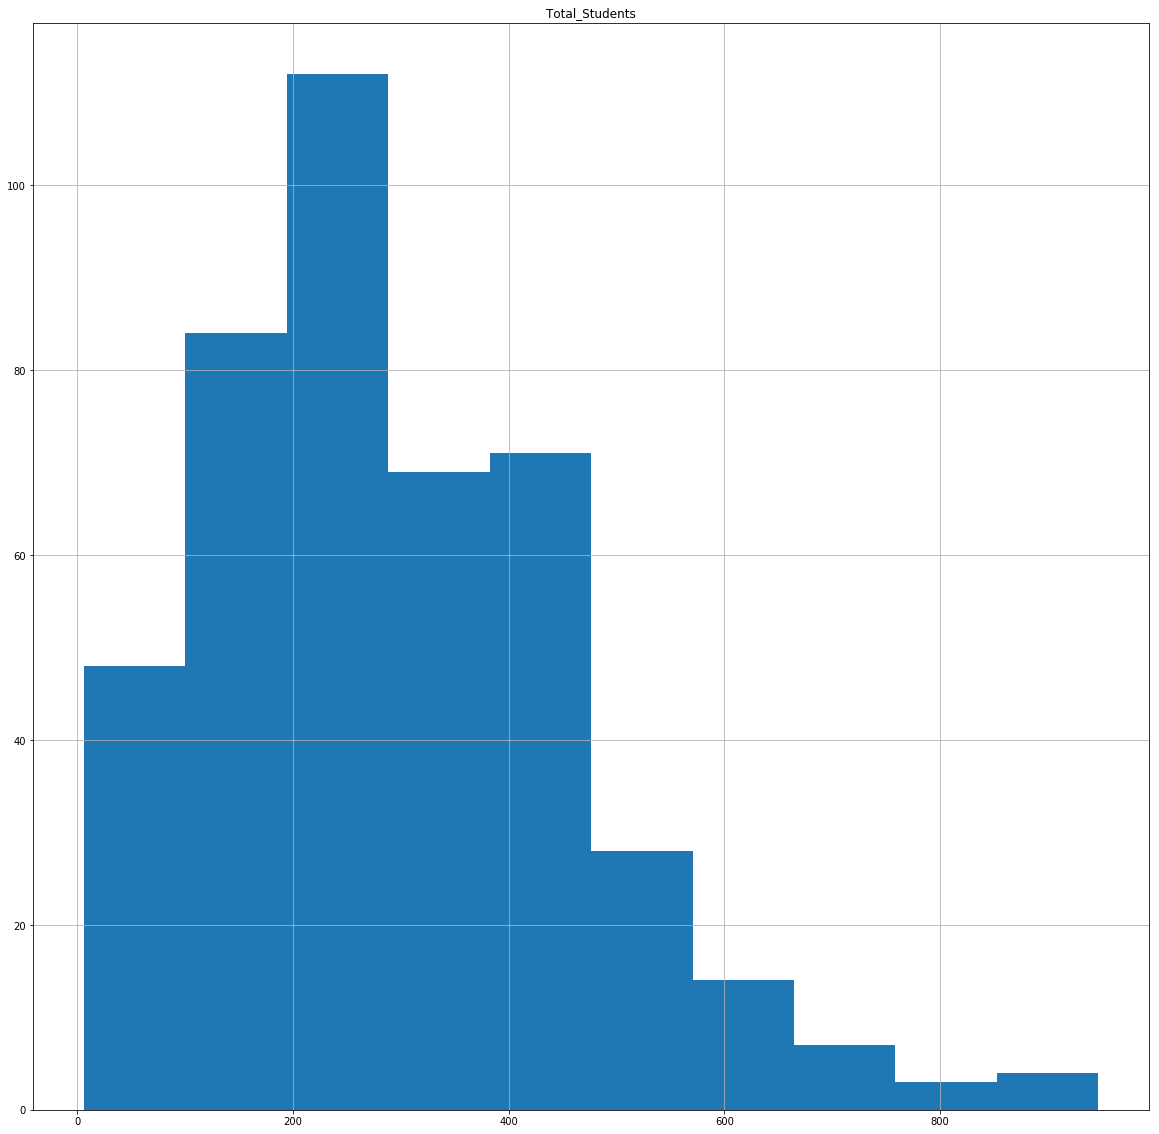

In [50]:
# Plotting histograms for all the continuous features
plt.figure()
df_primary_edited.hist(figsize=(20, 20))

<h2><u>School Data</u></h2>
<h3><u>Focus</u>: <i>Secondary Schools in Dublin</i></h3>

In [23]:
df_secondary = pd.read_csv('post_primary_schools_2013_2014.csv')

In [24]:
df_secondary.head(20)

,AIRO_ID,Roll_No,Off_Name,Add_1,Add_2,Add_3,Add_4,County,Gender,Pupil_Att,Irish_Lan,Fee,Ethos,F_13_14,M_13_14,xcoord,ycoord,Long,Lat
0,1,60010P,Loreto Secondary School,Balbriggan,Co Dublin,NaN,NaN,Dublin,Girls,Day,No subjects taught through Irish,N,CATHOLIC,1,0,320163.0,264003.0,320163.0,264003.0
1,2,60021U,St Marys Secondary School,Baldoyle,Dublin 13,NaN,NaN,Dublin,Girls,Day,No subjects taught through Irish,N,CATHOLIC,291,0,324596.0,240138.0,324596.0,240138.0
2,3,60030V,Blackrock College,Rock Road,Blackrock,Co. Dublin,NaN,Dublin,Boys,Mixed,No subjects taught through Irish,Y,CATHOLIC,0,999,320690.0,229652.0,320690.0,229652.0
3,4,60040B,Willow Park School,Rock Road,Blackrock,Co Dublin,NaN,Dublin,Boys,Mixed,No subjects taught through Irish,Y,CATHOLIC,0,206,320348.0,229910.0,320348.0,229910.0
4,5,60041D,Coláiste Eoin,Baile an Bhóthair,Bóthair Stigh Lorgan,Co Atha Cliath,NaN,Dublin,Boys,Day,All pupils taught all subjects through Irish,N,CATHOLIC,0,491,319719.0,229513.0,319719.0,229513.0
5,6,60042F,Coláiste Íosagáin,Bóthar Stigh Lorgan,Baile an Bhóthair,Co Átha Cliath,NaN,Dublin,Girls,Day,All pupils taught all subjects through Irish,N,CATHOLIC,494,0,319777.0,229489.0,319777.0,229489.0
6,7,60050E,Oatlands College,Mount Merrion,Co Dublin,NaN,NaN,Dublin,Boys,Day,No subjects taught through Irish,N,CATHOLIC,0,538,319911.0,228389.0,319911.0,228389.0
7,8,60070K,Dominican College,Sion Hill,Blackrock,Co Dublin,NaN,Dublin,Girls,Day,No subjects taught through Irish,N,CATHOLIC,391,0,320739.0,229424.0,320739.0,229424.0
8,9,60081P,Rockford Manor Secondary School,Stradbrook Rd,Blackrock,Co Dublin,NaN,Dublin,Girls,Day,No subjects taught through Irish,N,CATHOLIC,319,0,322559.0,227852.0,322559.0,227852.0
9,10,60090Q,Rathdown School,Upper Glenageary Road,Glenageary,Co. Dublin,NaN,Dublin,Girls,Mixed,No subjects taught through Irish,Y,CHURCH OF IRELAND,315,0,324802.0,226730.0,324802.0,226730.0


In [25]:
df_secondary.shape

(723, 19)

In [26]:
# Displaying the current data types of each columns
df_secondary.dtypes

AIRO_ID        int64
Roll_No       object
Off_Name      object
Add_1         object
Add_2         object
Add_3         object
Add_4         object
County        object
Gender        object
Pupil_Att     object
Irish_Lan     object
Fee           object
Ethos         object
F_13_14        int64
M_13_14        int64
xcoord       float64
ycoord       float64
Long         float64
Lat          float64
dtype: object

In [27]:
# Drop unneeded rows
df_secondary.drop(['Roll_No', 'Add_3', 'Add_4', 'Gender', 'Pupil_Att', 'Irish_Lan', 'Fee', 'Ethos'], axis = 1, inplace = True) 

In [28]:
# Change name of column
df_secondary.rename(columns={'F_13_14': 'Female_Student_No', 'M_13_14': 'Male_Student_No'}, inplace=True)

In [29]:
# Drop duplicate rows and columns, if any.
df_secondary_edited = df_secondary.drop_duplicates()

In [30]:
# Check new shape
df_secondary_edited.shape

(723, 11)

In [31]:
# Check unique values for County (Irregular Cardinality), only need Dublin information
df_secondary_edited.County.unique()

array(['Dublin', 'Cavan', 'Carlow', 'Kerry', 'Kilkenny', 'Kildare',
       'Wicklow', 'Clare', 'Cork', 'Donegal', 'Galway', 'Westmeath',
       'Laois', 'Wexford', 'Longford', 'Louth', 'Limerick', 'Meath',
       'Mayo', 'Monaghan', 'Waterford', 'Roscommon', 'Sligo', 'Tipperary',
       'Offaly', 'Leitrim'], dtype=object)

In [32]:
# Information for Dublin
df_secondary_edited = df_secondary_edited[df_secondary_edited.County == 'Dublin']

In [33]:
# New shape
df_secondary_edited.shape

(184, 11)

In [34]:
# Verify 
df_secondary_edited.head(20)

,AIRO_ID,Off_Name,Add_1,Add_2,County,Female_Student_No,Male_Student_No,xcoord,ycoord,Long,Lat
0,1,Loreto Secondary School,Balbriggan,Co Dublin,Dublin,1,0,320163.0,264003.0,320163.0,264003.0
1,2,St Marys Secondary School,Baldoyle,Dublin 13,Dublin,291,0,324596.0,240138.0,324596.0,240138.0
2,3,Blackrock College,Rock Road,Blackrock,Dublin,0,999,320690.0,229652.0,320690.0,229652.0
3,4,Willow Park School,Rock Road,Blackrock,Dublin,0,206,320348.0,229910.0,320348.0,229910.0
4,5,Coláiste Eoin,Baile an Bhóthair,Bóthair Stigh Lorgan,Dublin,0,491,319719.0,229513.0,319719.0,229513.0
5,6,Coláiste Íosagáin,Bóthar Stigh Lorgan,Baile an Bhóthair,Dublin,494,0,319777.0,229489.0,319777.0,229489.0
6,7,Oatlands College,Mount Merrion,Co Dublin,Dublin,0,538,319911.0,228389.0,319911.0,228389.0
7,8,Dominican College,Sion Hill,Blackrock,Dublin,391,0,320739.0,229424.0,320739.0,229424.0
8,9,Rockford Manor Secondary School,Stradbrook Rd,Blackrock,Dublin,319,0,322559.0,227852.0,322559.0,227852.0
9,10,Rathdown School,Upper Glenageary Road,Glenageary,Dublin,315,0,324802.0,226730.0,324802.0,226730.0


In [35]:
df_secondary_edited['AIRO_ID'] = df_secondary_edited['AIRO_ID'].astype('object')
df_secondary_edited['Off_Name'] = df_secondary_edited['Off_Name'].astype('category')
df_secondary_edited['Add_1'] = df_secondary_edited['Add_1'].astype('category')
df_secondary_edited['Add_2'] = df_secondary_edited['Add_2'].astype('category')
df_secondary_edited['County'] = df_secondary_edited['County'].astype('category')
df_secondary_edited['Female_Student_No'] = df_secondary_edited['Female_Student_No'].astype('int64')
df_secondary_edited['Male_Student_No'] = df_secondary_edited['Male_Student_No'].astype('int64')
df_secondary_edited['xcoord'] = df_secondary_edited['xcoord'].astype('object')
df_secondary_edited['ycoord'] = df_secondary_edited['ycoord'].astype('object')
df_secondary_edited['Long'] = df_secondary_edited['Long'].astype('object')
df_secondary_edited['Lat'] = df_secondary_edited['Lat'].astype('object')

df_secondary_edited.dtypes

AIRO_ID                object
Off_Name             category
Add_1                category
Add_2                category
County               category
Female_Student_No       int64
Male_Student_No         int64
xcoord                 object
ycoord                 object
Long                   object
Lat                    object
dtype: object

In [36]:
# Prepare a table with descriptive statistics for all the continuous features.
df_secondary_edited.describe().T

,count,mean,std,min,25%,50%,75%,max
Female_Student_No,184.0,256.63587,227.798523,0.0,47.5,219.0,388.50,949.0
Male_Student_No,184.0,257.51087,228.427243,0.0,0.0,215.5,436.75,999.0


In [37]:
# Prepare a table with descriptive statistics for all the categorical features.
category_columns = df_secondary_edited.select_dtypes(['category']).columns
df_secondary_edited[category_columns].describe().T

,count,unique,top,freq
Off_Name,184,179,Loreto College,3
Add_1,184,170,Further Education,2
Add_2,184,102,Blackrock,7
County,184,1,Dublin,184


In [38]:
# Check for irregular cardinality
pd.unique(df_secondary_edited.Off_Name.ravel())

array(['Loreto Secondary School', 'St Marys Secondary School',
       'Blackrock College', 'Willow Park School', 'Coláiste Eoin',
       'Coláiste Íosagáin', 'Oatlands College', 'Dominican College',
       'Rockford Manor Secondary School', 'Rathdown School',
       'Clonkeen College', 'Castleknock College',
       'Mount Sackville Secondary School', 'Moyle Park College',
       'Coláiste Bríde', 'Loreto Abbey Secondary School',
       'Mount Anville Secondary School', 'Notre Dame Secondary School',
       'Christian Brothers College', 'Loreto College Foxrock',
       'Holy Child Secondary School',
       'St Joseph Of Cluny Secondary School', 'St Benildus College',
       'St Laurence College', 'St Josephs College',
       'Coláiste Phádraig CBS', 'The Kings Hospital', 'St Pauls College',
       'Árdscoil La Salle', 'Manor House School', 'Da La Salle College',
       "St Columba's College", 'Rockbrook Park School',
       'Loreto High School', 'Sancta Maria College', 'Colaiste Eanna',

In [39]:
# Check for irregular cardinality
pd.unique(df_secondary_edited.Add_1.ravel())

array(['Balbriggan', 'Baldoyle', 'Rock Road', 'Baile an Bhóthair',
       'Bóthar Stigh Lorgan', 'Mount Merrion', 'Sion Hill',
       'Stradbrook Rd', 'Upper Glenageary Road', 'Clonkeen Road',
       'Castleknock', 'Chapelizod', 'Clondalkin', 'New Road', 'Dalkey',
       'Mount Anville Rd', 'Upper Churchtown Road', 'Monkstown Park',
       'Foxrock', 'Military Road', 'Bellevue Park', 'Upper Kilmacud Rd',
       'Loughlinstown', 'Lucan', 'Roselawn', 'Palmerstown', 'Sybil Hill',
       'Raheny Road', 'Watermill Road', 'Whitechurch', 'Edmondstown Road',
       'Beaufort', 'Ballyroan Crescent', 'Ballyroan', 'Convent Lane',
       'Upper Kilmacud Road', 'Dublin Road', 'Greenfield Road',
       'St Fintans Road', 'Merville Ave', 'Glasnevin', "James's Street",
       'Griffith Avenue', 'Christian Brothers', 'North Richmond Street',
       'Bothar Rath Tó', 'Synge St.,', 'Malahide Road', 'Long Mile Road',
       'Collins Avenue Ext', 'Westland Row', 'Nephin Road', 'Ballsbridge',
       'Le Fan

In [40]:
# Check for irregular cardinality
pd.unique(df_secondary_edited.Add_2.ravel())

array(['Co Dublin', 'Dublin 13', 'Blackrock', 'Bóthair Stigh Lorgan',
       'Baile an Bhóthair', 'Glenageary', 'Dublin 15', 'Dublin 20',
       'Dublin 22', 'Clondalkin', 'Dublin 14', 'Dun Laoghaire',
       'Dublin 18', 'Killiney', 'Ballinclea Rd', 'Stillorgan', 'Lucan',
       'Raheny', 'Churchtown', 'Dublin 16', 'Rathfarnham', 'Grange Rd',
       'Dublin16', 'Rush', 'Sutton', 'Swords', 'Fairview', 'Dublin 11',
       'Dublin 8', 'Dublin 9', 'Nth Brunswick Street', 'Dublin 1',
       'Baile Atha Cliath 7', 'Dublin 8.', 'Artane', 'Walkinstown',
       'Whitehall', 'Dublin 2', 'Cabra', 'Dublin 4', 'Ballyfermot',
       'Finglas', 'Ranelagh', 'Malahide Road', 'Dublin 6', 'Dublin 6W',
       'Terenure', 'Finglas West', 'Ballsbridge', 'Clonskeagh', 'Rathgar',
       'Drumcondra', 'Glasnaíon', 'Dublin 7', 'Dublin 10', 'Clontarf',
       'Glasnevin', 'Killester', 'Dublin 12', 'Crumlin', 'Coolock',
       'Inchicore', 'Rathmines', 'Goatstown Road', 'Donnybrook',
       'Sandyford', 'Drimnag

In [41]:
# Check for irregular cardinality
pd.unique(df_secondary_edited.County.ravel())

array(['Dublin'], dtype=object)

In [42]:
# Checking for Missing Values
df_secondary_edited.isnull().sum()

AIRO_ID              0
Off_Name             0
Add_1                0
Add_2                0
County               0
Female_Student_No    0
Male_Student_No      0
xcoord               0
ycoord               0
Long                 0
Lat                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6F09A1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6F113320>]], dtype=object)

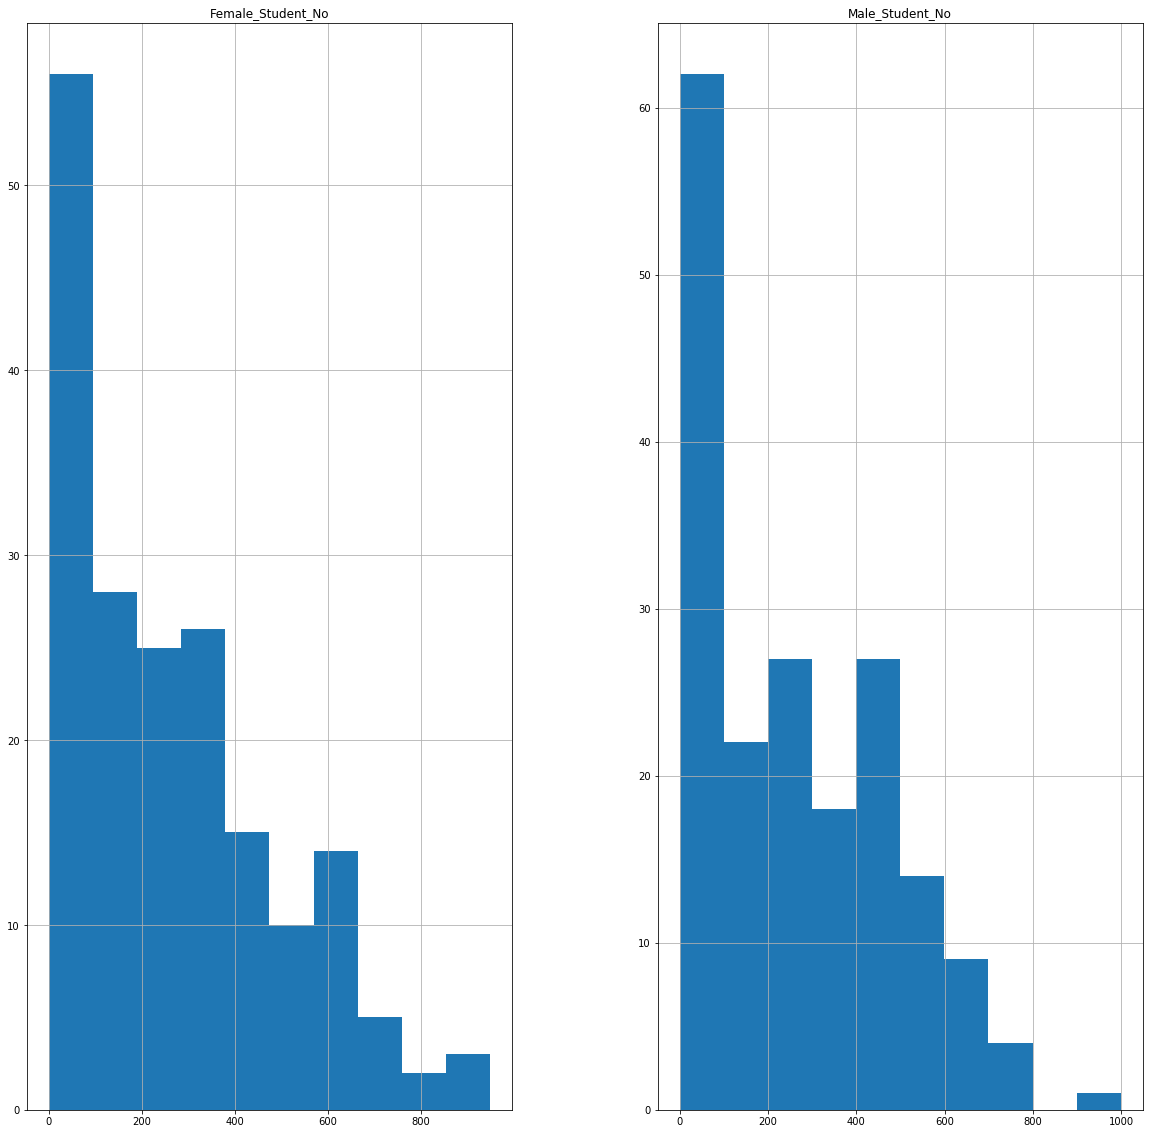

In [43]:
# Plotting histograms for all the continuous features
plt.figure()
df_secondary_edited.hist(figsize=(20, 20))